TODO
- [] 试试时钟的向量相乘的距离

$PE(k,i)$ 对应 $k$ 位置上第 i 个元素的取值

$$
\begin{equation}
PE(k, i) =
\begin{cases} 
sin(\frac{k}{n^{ i / 2 d}})
& \text{if } i \% 2 = 0 \\
cos(\frac{k}{n^{ (i-1) / 2 d}})
& \text{if } i \% 2 = 1
\end{cases}
\end{equation}
$$

$PE(k, i)$ 对应 $k$ 位置上的 positional encoding 向量：

$$
\begin{equation}
PE(k) = \begin{bmatrix}
sin(k) \\
cos(k) \\
sin(\frac{k}{n^{1/d}}) \\
cos(\frac{k}{n^{1/d}}) \\
sin(\frac{k}{n^{2/d}}) \\
cos(\frac{k}{n^{2/d}}) \\
\vdots \\
sin(\frac{k}{n^{ (d - 2) / 2 d}}) \\
cos(\frac{k}{n^{ (d - 1) / 2 d}})
\end{bmatrix}
_{d \times 1}
\end{equation}
$$


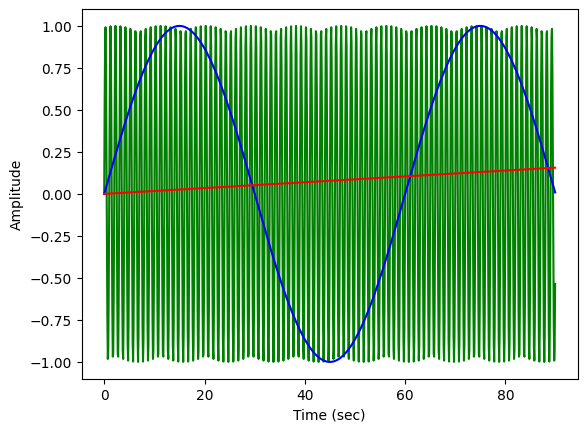

In [96]:
from matplotlib import pyplot as plt
import numpy as np

t = np.linspace(0, 90, 1000, endpoint=False) # 1000 points in 120 seconds

# Create the first subplot
y1 = np.sin(2 * np.pi * t)
y2 = np.sin(2 * np.pi * t / 60)
y3 = np.sin(2 * np.pi * t / 3600)
plt.plot(t, y1, label="seconds", color="green")
plt.plot(t, y2, label="minutes", color="blue")
plt.plot(t, y3, label="hours", color="red")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

# Display the plots
plt.show()

如果用一秒为步长的时钟作为 positional encoding 应该怎么做？

$$
\begin{equation}
PE(k) = \begin{bmatrix}
sin(2 \pi k) \\
cos(2 \pi k) \\
sin(2 \pi k / 60) \\
cos(2 \pi k / 60) \\
sin(2 \pi k / {60^2}) \\
cos(2 \pi k / {60^2}) \\
\end{bmatrix}
_{6 \times 1}
\end{equation}
$$

分针的波长 = 秒针的波长 * 60。

回到 transformer 的 Positional Encoding 中，它和时钟有一点不一样就是它的不同的维度上的波长并不是整数倍对齐的，而是会除以一个维度数 $d$。 

设 $d$ 为 1，那么第二个维的波长就是第一维波长的 $n$ 的整数倍。如果 $n$ 是 10000，效果上就是第一维每走 10000 圈时候，第二维走一圈。

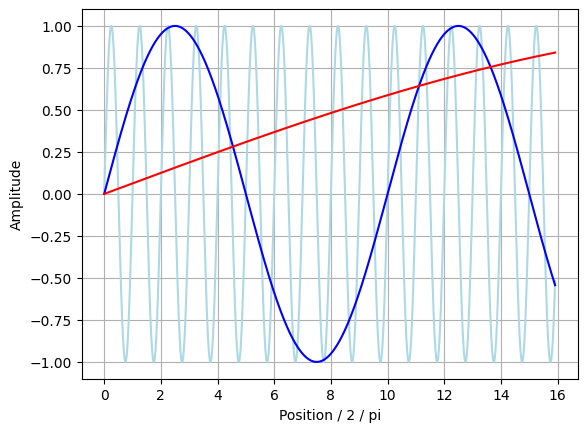

In [97]:
from matplotlib import pyplot as plt
import numpy as np

d = 1
n = 10
t = np.linspace(0, 100, 8000, endpoint=False)

# Create the first subplot
y1 = np.sin(t)
y2 = np.sin(t / (n ** (1 / d)))
y3 = np.sin(t / (n ** (2 / d)))
plt.grid()
plt.plot(t/2/np.pi, y1, label="dim0", color="lightblue")
plt.plot(t/2/np.pi, y2, label="dim1", color="blue")
plt.plot(t/2/np.pi, y3, label="dim2", color="red")
plt.xlabel('Position / 2 / pi')
plt.ylabel('Amplitude')

# Display the plots
plt.show()

设置除以 $d$ 的话就不一样了，第二维的波长相对第一维的波长不再是 $n$ 的整数倍，猜如果不除以这个 $d$ 的话，整个距离向量里空值太多？除以 $d$ 的话，能保证最后一个位置的时候，最后一个维度正好走完一个波长。

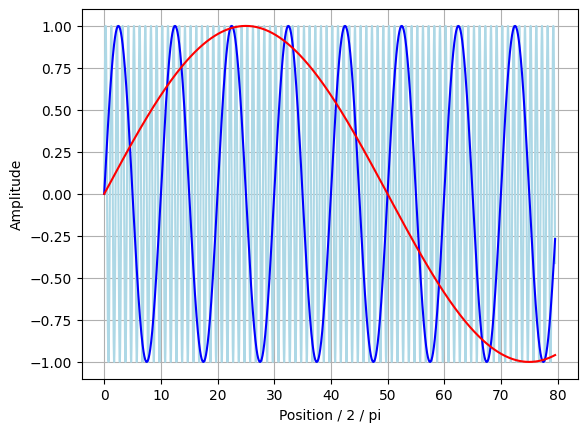

In [102]:
from matplotlib import pyplot as plt
import numpy as np

d = 3
n = 1000
t = np.linspace(0, 500, 8000, endpoint=False)

# Create the first subplot
y1 = np.sin(t)
y2 = np.sin(t / (n ** (1 / d)))
y3 = np.sin(t / (n ** (2 / d)))
plt.grid()
plt.plot(t/2/np.pi, y1, label="dim0", color="lightblue")
plt.plot(t/2/np.pi, y2, label="dim1", color="blue")
plt.plot(t/2/np.pi, y3, label="dim2", color="red")
plt.xlabel('Position / 2 / pi')
plt.ylabel('Amplitude')

# Display the plots
plt.show()

## 向量距离

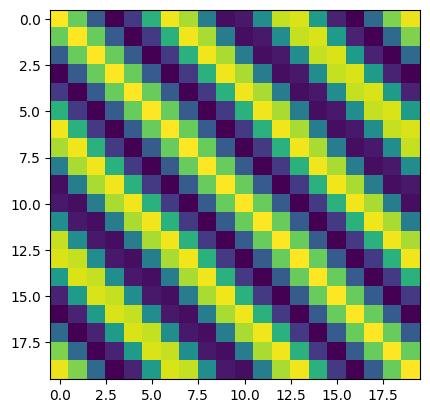

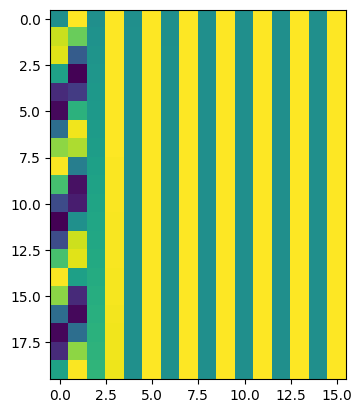

In [105]:
def clockPosition(k):
    return np.array([
        np.sin(k),
        np.cos(k),
        np.sin(k / 60),
        np.cos(k / 60),
        np.sin(k / 3600),
        np.cos(k / 3600),
    ])

def clockPosition2(k, d=8):
    p = np.zeros(d)
    for i in range(0, int(d/2)):
        denominator = np.power(60, i)
        p[i*2] = np.sin(k / denominator)
        p[i*2+1] = np.cos(k / denominator)
    return p

pe = np.array([clockPosition2(i, 16) for i in range(20)])
distances = pe.dot(pe.T)
plt.imshow(distances)
plt.show()

plt.imshow(pe)
plt.show()

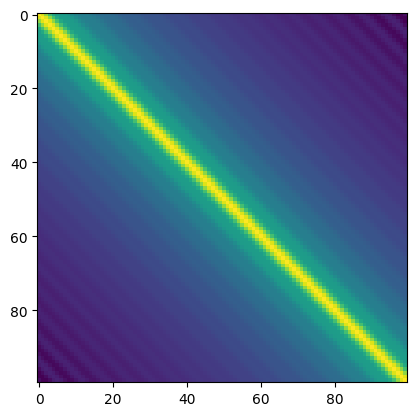

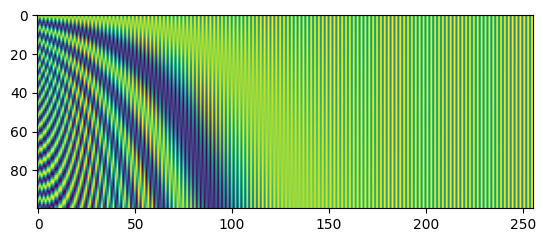

In [98]:
def sinPosition(pos, d=256, n=10000):
    p = np.zeros(d)
    for i in np.arange(int(d/2)):
        denominator = np.power(n, 2*i/d)
        p[2*i] = np.sin(pos/denominator)
        p[2*i+1] = np.cos(pos/denominator)
    return p

pe = np.array([sinPosition(i) for i in range(100)])
distances = pe.dot(pe.T)
plt.imshow(distances)
plt.show()

plt.imshow(pe)
plt.show()